In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from preprocess import Preprocess
import tensorflow as tf
import rrn

/Users/larry/Py3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
df = pd.read_csv('rating_data.csv')
df['freq'] = df.groupby('uid')['uid'].transform('count')  # count frequncy by column's values
df = df[df['freq'] > 5]  # remove row which corresponding frequence < 5

for season_idx in range(ground_truth.shape[0]):
    for usr_idx in range(ground_truth.shape[1]):
        for item_idx in range(ground_truth.shape[2]):
            usr = preprocess.user_map[batch_user[usr_idx]]
            item = batch_item[item_idx] - 1
            try:
                assert ground_truth[season_idx][usr_idx][item_idx] == usr_matrix[usr_idx][season_idx][item]
            except AssertionError:
                print ("season_idx, usr_idx, item_idx: %d, %d, %d" % (season_idx, usr_idx, item))
            try:
                assert ground_truth[season_idx][usr_idx][item_idx] == item_matrix[item_idx][season_idx][usr]
            except AssertionError:
                print ("season_idx, usr, item_idx: %d, %d, %d" % (season_idx, usr, item_idx))

In [3]:
def get_hparas(name):
    if name == 'USER':
        hparas = {
            'NAME': name,
            'EMBED_UNITS': 40,
            'BATCH_SIZE': 64,
            'LSTM_UNITS': 40,
            'LATENT_UNITS': 20,
            'ITEM_NUM': 102,
            'TIME_ELAPSE': 25,
            'STATIONARY_LENGTH': 20,
        }
    elif name == 'ITEM':
        hparas = {
            'NAME': name,
            'EMBED_UNITS': 40,
            'BATCH_SIZE': 64,
            'LATENT_UNITS': 20,
            'LSTM_UNITS': 40,
            'TIME_ELAPSE': 25,
            'USER_NUM': 842,
            'STATIONARY_LENGTH': 20
        }
    
    return hparas

In [4]:
user_vectors = np.load('./user_vectors.npy')
item_vectors = np.load('./item_vectors.npy')

In [8]:
user_hparas = get_hparas('USER')
item_hparas = get_hparas('ITEM')

tf.reset_default_graph()

model = rrn.RRN(user_hparas=user_hparas, item_hparas=item_hparas, lr=0.01)

In [9]:
model.train(df, user_vectors, item_vectors)

100%|██████████| 100/100 [00:20<00:00,  4.79it/s]


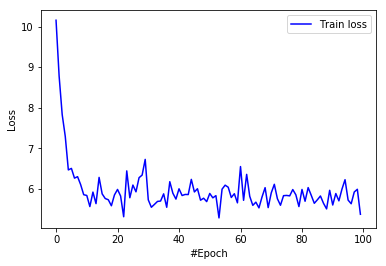

In [10]:
import matplotlib.pyplot as plt
train_loss = model.log['train_loss']

plt.plot(range(len(train_loss)), train_loss, color='blue', label='Train loss')
# plt.plot(range(len(test_loss)), test_loss, color='red', label='Test loss')
plt.legend(loc="upper right")
plt.xlabel('#Epoch')
plt.ylabel('Loss')
plt.show()